**Validação Cruzada (Cross-Validation) vs. Validação Simples (Single Validation): Testando seu Modelo**

Imagine que você está estudando para uma prova importante.

Validação Simples (Single Validation): É como estudar para a prova lendo apenas um capítulo do livro e depois fazer a prova. Se a prova cobrir algo que não estava naquele capítulo, você pode se dar mal. Você só teve uma "chance" de se testar.

Validação Cruzada (Cross-Validation): É como dividir todo o conteúdo do livro em vários pedaços (capítulos), estudar um pedaço e se testar nos outros. Depois, você troca: estuda outro pedaço e se testa nos restantes, e assim por diante. Ao final, você terá uma visão muito mais completa e justa do seu conhecimento sobre o livro todo, porque se testou em várias combinações de conteúdo.

Iniciando a demonstração didática de Validação Simples e Validação Cruzada (K-Fold)...

PASSO 1: Carregamos o conjunto de dados Iris (Flores).
  - Temos 150 amostras (flores).
  - Cada flor tem 4 características (medidas).
  - Queremos classificar as flores em 3 espécies diferentes.

---------------------------------------------------

PASSO 2: Aplicando a VALIDAÇÃO SIMPLES (Holdout).
  -> É como separar o livro em APENAS duas partes: uma para estudar e outra para a prova final.
  - Dados de Treino: 105 amostras
  - Dados de Teste: 45 amostras

  Acurácia do Modelo (Validação Simples): 0.9111
  (Este é o resultado de APENAS UMA prova.)
---------------------------------------------------

PASSO 3: Aplicando a VALIDAÇÃO CRUZADA (K-Fold Cross-Validation).
  -> É como dividir o livro em VÁRIOS capítulos, estudar uns e testar nos outros, várias vezes.
  - Vamos dividir os dados em 5 'dobras' (folds).
  - O modelo será treinado e testado 5 vezes, usando diferentes combinações de dados.
    -

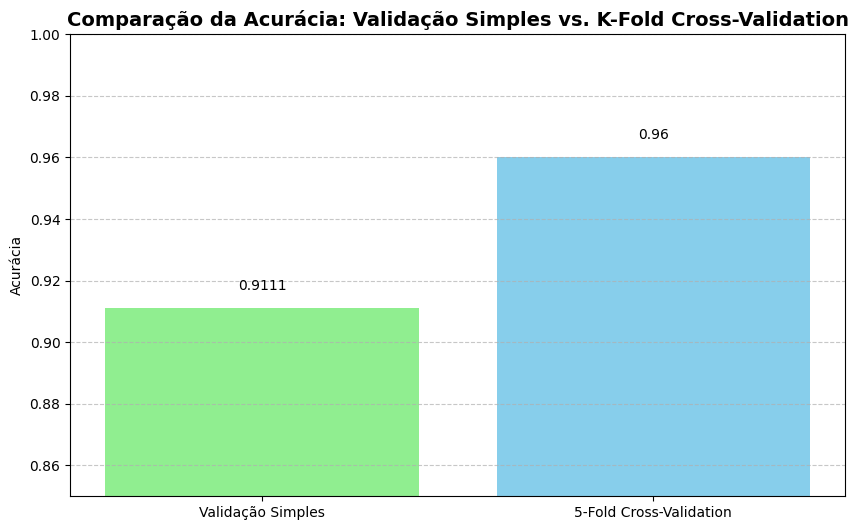


--- RESUMO FINAL ---
No gráfico, você vê a acurácia de cada método:
- A **Validação Simples** nos deu APENAS um número (a acurácia de uma única prova).
- A **Validação Cruzada (K-Fold)** nos deu uma **MÉDIA de várias acurácias**, e também um **desvio padrão** (que mostra o quanto os resultados variaram entre as 'provas').

**Qual é melhor?**
- Para ter uma estimativa **mais CONFIÁVEL** do quão bem seu modelo se sairá em dados novos, a **Validação Cruzada** é quase sempre a melhor escolha.
- A **Validação Simples** é boa para um teste rápido, mas não deve ser a única forma de avaliar a performance de um modelo em produção.
É como ter vários avaliadores em vez de apenas um para julgar seu trabalho: o consenso deles será mais justo e representativo.


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris # Nosso dataset de exemplo
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

print("Iniciando a demonstração didática de Validação Simples e Validação Cruzada (K-Fold)...\n")

# --- PASSO 1: Carregar e Preparar os Dados ---
# Usaremos o famoso dataset Iris, que contém medidas de flores para classificá-las em 3 espécies.
iris = load_iris()
X = iris.data  # Características das flores (comprimento, largura de sépalas e pétalas)
y = iris.target # Espécie da flor (nosso alvo: 0, 1 ou 2)

print("PASSO 1: Carregamos o conjunto de dados Iris (Flores).")
print(f"  - Temos {X.shape[0]} amostras (flores).")
print(f"  - Cada flor tem {X.shape[1]} características (medidas).")
print(f"  - Queremos classificar as flores em {len(np.unique(y))} espécies diferentes.\n")
print("---------------------------------------------------\n")

# --- PASSO 2: Validação Simples (Single Validation / Holdout) ---
# Dividindo os dados em APENAS duas partes: treino e teste.

print("PASSO 2: Aplicando a VALIDAÇÃO SIMPLES (Holdout).")
print("  -> É como separar o livro em APENAS duas partes: uma para estudar e outra para a prova final.")

# test_size=0.3 significa que 30% dos dados serão para teste e 70% para treino.
# random_state garante que a divisão seja a mesma sempre que você rodar o código.
# stratify=y garante que a proporção das espécies seja mantida na divisão.
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"  - Dados de Treino: {X_train_simple.shape[0]} amostras")
print(f"  - Dados de Teste: {X_test_simple.shape[0]} amostras\n")

# Treinar o modelo na parte de treino
model_simple = LogisticRegression(max_iter=200, random_state=42, solver='liblinear')
model_simple.fit(X_train_simple, y_train_simple)

# Avaliar o modelo na parte de teste
y_pred_simple = model_simple.predict(X_test_simple)
accuracy_simple = accuracy_score(y_test_simple, y_pred_simple)

print(f"  Acurácia do Modelo (Validação Simples): {accuracy_simple:.4f}")
print("  (Este é o resultado de APENAS UMA prova.)")
print("---------------------------------------------------\n")

# --- PASSO 3: Validação Cruzada (K-Fold Cross-Validation) ---
# Dividindo os dados em K 'dobras' (folds) e repetindo o processo K vezes.

print("PASSO 3: Aplicando a VALIDAÇÃO CRUZADA (K-Fold Cross-Validation).")
print("  -> É como dividir o livro em VÁRIOS capítulos, estudar uns e testar nos outros, várias vezes.")

n_splits = 5 # Vamos usar 5 'dobras' (k=5)
print(f"  - Vamos dividir os dados em {n_splits} 'dobras' (folds).")
print("  - O modelo será treinado e testado 5 vezes, usando diferentes combinações de dados.")

# Crie um objeto KFold para gerenciar as divisões
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lista para armazenar as acurácias de cada iteração
accuracies_kf = []
iteration = 1

# Itera sobre cada divisão gerada pelo KFold
for train_index, test_index in kf.split(X):
    X_train_kf, X_test_kf = X[train_index], X[test_index]
    y_train_kf, y_test_kf = y[train_index], y[test_index]

    model_kf = LogisticRegression(max_iter=200, random_state=42, solver='liblinear')
    model_kf.fit(X_train_kf, y_train_kf)
    y_pred_kf = model_kf.predict(X_test_kf)

    accuracy_kf = accuracy_score(y_test_kf, y_pred_kf)
    accuracies_kf.append(accuracy_kf)
    print(f"    - Acurácia na Iteração {iteration}: {accuracy_kf:.4f}")
    iteration += 1

mean_accuracy_kf = np.mean(accuracies_kf)
std_accuracy_kf = np.std(accuracies_kf)

print(f"\n  Acurácia Média (Validação Cruzada {n_splits}-Fold): {mean_accuracy_kf:.4f}")
print(f"  Desvio Padrão da Acurácia: {std_accuracy_kf:.4f}")
print("  (Este é o resultado da MÉDIA de várias 'provas', muito mais confiável!)")
print("---------------------------------------------------\n")

# --- PASSO 4: Visualização dos Resultados ---

print("PASSO 4: Visualizamos a diferença entre as abordagens.")

plt.figure(figsize=(10, 6))
bars = plt.bar(['Validação Simples', f'{n_splits}-Fold Cross-Validation'],
               [accuracy_simple, mean_accuracy_kf],
               color=['lightgreen', 'skyblue'])

plt.ylabel('Acurácia')
plt.title('Comparação da Acurácia: Validação Simples vs. K-Fold Cross-Validation', fontsize=14, weight='bold')
plt.ylim(0.85, 1.0) # Ajusta o limite Y para focar nos resultados
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adiciona os valores nas barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, round(yval, 4), ha='center', va='bottom')

plt.show()

print("\n--- RESUMO FINAL ---")
print("No gráfico, você vê a acurácia de cada método:")
print("- A **Validação Simples** nos deu APENAS um número (a acurácia de uma única prova).")
print("- A **Validação Cruzada (K-Fold)** nos deu uma **MÉDIA de várias acurácias**, e também um **desvio padrão** (que mostra o quanto os resultados variaram entre as 'provas').")
print("\n**Qual é melhor?**")
print("- Para ter uma estimativa **mais CONFIÁVEL** do quão bem seu modelo se sairá em dados novos, a **Validação Cruzada** é quase sempre a melhor escolha.")
print("- A **Validação Simples** é boa para um teste rápido, mas não deve ser a única forma de avaliar a performance de um modelo em produção.")
print("É como ter vários avaliadores em vez de apenas um para julgar seu trabalho: o consenso deles será mais justo e representativo.")